In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
auto_loan_file = "../data/auto_loan_data_short.csv"
registration_file = "../data/vehicle_registration_data.csv"

# オートローンデータ
auto_loan_df = pd.read_csv(auto_loan_file, encoding='utf-8')
print(f"オートローンデータ形状: {auto_loan_df.shape}")

# 新車登録データ
registration_df = pd.read_csv(registration_file, encoding='utf-8')
print(f"新車登録データ形状: {registration_df.shape}")

オートローンデータ形状: (31655, 21)
新車登録データ形状: (54, 14)


In [3]:
# オートローンデータの日付変換
auto_loan_df['契約年月日'] = pd.to_datetime(auto_loan_df['契約年月日'])

# 新車のみフィルタリング
new_car_loans = auto_loan_df[auto_loan_df['新車/中古車'] == '新車'].copy()

print(f"新車オートローン件数: {len(new_car_loans)}")
new_car_loans

新車オートローン件数: 9083


,契約年月日,新車/中古車,国産車/輸入車,車両区分,ボディタイプ,メーカー,車種名_集約名,車種名,顧客数,件数,...,車輌本体価格,車輌本体価格_税込,諸費用_税込,その他費用_税込,付属品オプション費用_税込,現金価格合計,現金,下取り価格,頭金,残金_クレジット金額
0,2024-01-05,新車,国産車,軽自動車,SUV・ﾋﾟｯｸｱｯﾌﾟ,ｽｽﾞｷ,ﾊｽﾗｰ,ﾊｽﾗｰ,2,2,...,NaN,3040000,170000,130000,190000,3530000,790000,0,790000,2740000
1,2024-01-05,新車,国産車,普通自動車,ﾊﾞﾝ,ﾄﾖﾀ,ﾊｲｴｰｽ,ﾊｲｴｰｽﾊﾞﾝ,2,2,...,6448000.0,7496000,511030,-25110,1259700,9241620,0,0,0,9241620
40,2024-01-09,新車,国産車,軽自動車,SUV・ﾋﾟｯｸｱｯﾌﾟ,ｽｽﾞｷ,ｼﾞﾑﾆｰｼｴﾗ,ｼﾞﾑﾆｰｼｴﾗ,2,2,...,1863400.0,5237500,325968,-13768,340300,5890000,300000,100000,400000,5490000
41,2024-01-09,新車,国産車,軽自動車,ｺﾝﾊﾟｸﾄｶｰ・ﾊｯﾁﾊﾞｯｸ,ﾆｯｻﾝ,ﾙｰｸｽ,ﾙｰｸｽ,2,2,...,4215200.0,4215200,230480,-258686,635936,4822930,304000,68930,372930,4450000
42,2024-01-09,新車,国産車,軽自動車,ｺﾝﾊﾟｸﾄｶｰ・ﾊｯﾁﾊﾞｯｸ,ﾎﾝﾀﾞ,N BOX,N BOX,5,5,...,5473600.0,9217950,586110,-121700,892510,10574870,1050000,146450,1196450,9378420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31590,2024-12-27,新車,国産車,普通自動車,ﾊﾞﾝ,ﾎﾝﾀﾞ,ﾌﾘｰﾄﾞ,ﾌﾘｰﾄﾞ,9,9,...,3206500.0,9396200,642820,-75220,1388700,11352500,3136500,1350000,2986500,6866000
31591,2024-12-27,新車,国産車,普通自動車,SUV・ﾋﾟｯｸｱｯﾌﾟ,ﾏﾂﾀﾞ,CX-3,CX-3,2,2,...,NaN,2565200,313863,-188485,139422,2830000,0,0,0,2830000
31592,2024-12-27,新車,国産車,普通自動車,ﾊﾞﾝ,ﾐﾂﾋﾞｼ,ﾃﾞﾘｶD:5,ﾃﾞﾘｶD:5,2,2,...,NaN,0,0,0,0,0,0,0,0,0
31593,2024-12-27,新車,国産車,普通自動車,ﾊﾞﾝ,ﾐﾂﾋﾞｼ,ﾃﾞﾘｶﾐﾆ,ﾃﾞﾘｶﾐﾆ,2,2,...,NaN,0,0,0,0,0,0,0,0,0


In [4]:
maker_mapping = {
    # 国産メーカー
    'ﾄﾖﾀ': 'トヨタ',
    'ﾆｯｻﾝ': '日産', 
    'ﾎﾝﾀﾞ': 'ホンダ',
    'ﾏﾂﾀﾞ': 'マツダ',
    'ｽｽﾞｷ': 'スズキ',
    'ﾀﾞｲﾊﾂ': 'ダイハツ',
    'ｽﾊﾞﾙ': 'ＳＵＢＡＲＵ',
    'ﾐﾂﾋﾞｼ': '三菱',
    'ｲｽｽﾞ': 'いすゞ',
    'ﾐﾂﾋﾞｼﾌｿｳ': '三菱ふそう',
    
    # 輸入車（すべて「輸入車」にまとめる）
    'ABARTH': '輸入車',
    'Audi': '輸入車', 
    'BMW': '輸入車',
    'BYD': '輸入車',
    'CITROEN': '輸入車',
    'FIAT': '輸入車',
    'JEEP': '輸入車',
    'LOTUS': '輸入車',
    'Land Rover': '輸入車',
    'Mercedes-Benz': '輸入車',
    'PEUGEOT': '輸入車',
    'Renault': '輸入車',
    'Tesla Motors': '輸入車',
    'VOLVO': '輸入車',
    'Volkswagen': '輸入車',
    
    # レクサスはトヨタに統合
    'ﾚｸｻｽ': 'トヨタ',
    'その他': 'その他'
}

# 元のメーカー名を確認
print("元のメーカー名一覧:")
print(sorted(new_car_loans['メーカー'].unique()))

# メーカー名をマッピング
new_car_loans['メーカー'] = new_car_loans['メーカー'].map(maker_mapping)

print("\nマッピング後のメーカー名一覧:")
print(sorted(new_car_loans['メーカー'].dropna().unique()))

new_car_loans = new_car_loans.dropna()

new_car_loans

元のメーカー名一覧:
['ABARTH', 'Audi', 'BMW', 'BYD', 'CITROEN', 'FIAT', 'JEEP', 'LOTUS', 'Land Rover', 'Mercedes-Benz', 'PEUGEOT', 'Renault', 'Tesla Motors', 'VOLVO', 'Volkswagen', 'その他', 'ｲｽｽﾞ', 'ｽｽﾞｷ', 'ｽﾊﾞﾙ', 'ﾀﾞｲﾊﾂ', 'ﾄﾖﾀ', 'ﾆｯｻﾝ', 'ﾎﾝﾀﾞ', 'ﾏﾂﾀﾞ', 'ﾐﾂｵｶ', 'ﾐﾂﾋﾞｼ', 'ﾐﾂﾋﾞｼﾌｿｳ', 'ﾚｸｻｽ']

マッピング後のメーカー名一覧:
['いすゞ', 'その他', 'スズキ', 'ダイハツ', 'トヨタ', 'ホンダ', 'マツダ', '三菱', '三菱ふそう', '日産', '輸入車', 'ＳＵＢＡＲＵ']


,契約年月日,新車/中古車,国産車/輸入車,車両区分,ボディタイプ,メーカー,車種名_集約名,車種名,顧客数,件数,...,車輌本体価格,車輌本体価格_税込,諸費用_税込,その他費用_税込,付属品オプション費用_税込,現金価格合計,現金,下取り価格,頭金,残金_クレジット金額
1,2024-01-05,新車,国産車,普通自動車,ﾊﾞﾝ,トヨタ,ﾊｲｴｰｽ,ﾊｲｴｰｽﾊﾞﾝ,2,2,...,6448000.0,7496000,511030,-25110,1259700,9241620,0,0,0,9241620
40,2024-01-09,新車,国産車,軽自動車,SUV・ﾋﾟｯｸｱｯﾌﾟ,スズキ,ｼﾞﾑﾆｰｼｴﾗ,ｼﾞﾑﾆｰｼｴﾗ,2,2,...,1863400.0,5237500,325968,-13768,340300,5890000,300000,100000,400000,5490000
41,2024-01-09,新車,国産車,軽自動車,ｺﾝﾊﾟｸﾄｶｰ・ﾊｯﾁﾊﾞｯｸ,日産,ﾙｰｸｽ,ﾙｰｸｽ,2,2,...,4215200.0,4215200,230480,-258686,635936,4822930,304000,68930,372930,4450000
42,2024-01-09,新車,国産車,軽自動車,ｺﾝﾊﾟｸﾄｶｰ・ﾊｯﾁﾊﾞｯｸ,ホンダ,N BOX,N BOX,5,5,...,5473600.0,9217950,586110,-121700,892510,10574870,1050000,146450,1196450,9378420
131,2024-01-10,新車,国産車,普通自動車,ﾊﾞﾝ,トヨタ,ﾊｲｴｰｽ,ﾊｲｴｰｽﾊﾞﾝ,3,3,...,12043000.0,12879500,804480,-997507,2388287,15074760,0,250000,250000,14824760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31583,2024-12-27,新車,国産車,普通自動車,ﾊﾞﾝ,日産,ｾﾚﾅ,ｾﾚﾅ,7,7,...,3548600.0,7278700,280330,-529474,2020444,9050000,3140000,0,3140000,5910000
31584,2024-12-27,新車,国産車,軽自動車,ｺﾝﾊﾟｸﾄｶｰ・ﾊｯﾁﾊﾞｯｸ,日産,ﾃﾞｲｽﾞ,ﾃﾞｲｽﾞ,5,5,...,2956800.0,6226881,845349,-62050,1439820,8450000,0,330000,330000,8120000
31586,2024-12-27,新車,国産車,軽自動車,ｺﾝﾊﾟｸﾄｶｰ・ﾊｯﾁﾊﾞｯｸ,ホンダ,N BOX,N BOX,32,32,...,29731900.0,17583800,991354,-151075,3344721,21768800,0,130000,130000,21638800
31588,2024-12-27,新車,国産車,普通自動車,SUV・ﾋﾟｯｸｱｯﾌﾟ,ホンダ,ｳﾞｪｾﾞﾙ,ｳﾞｪｾﾞﾙ,14,14,...,3198800.0,6735340,275974,3900,617060,7632274,160000,212274,372274,7260000


In [5]:
# メーカー別に各日の件数を合計する
auto_loan_monthly = new_car_loans.groupby(['契約年月日', 'メーカー']).agg({
    '件数': 'sum',
}).reset_index()

# 月次に変換
auto_loan_monthly['年月'] = auto_loan_monthly['契約年月日'].dt.to_period('M')
auto_loan_monthly = auto_loan_monthly.groupby(['年月', 'メーカー']).agg({
    '件数': 'sum',
}).reset_index()

In [6]:
registration_df['年月'] = pd.to_datetime(registration_df['年月'])
registration_melted = registration_df.melt(
    id_vars=['年月'], 
    var_name='メーカー', 
    value_name='登録台数'
)

registration_melted.head()

,年月,メーカー,登録台数
0,2021-01-01,UDトラックス,349.0
1,2021-02-01,UDトラックス,561.0
2,2021-03-01,UDトラックス,1345.0
3,2021-04-01,UDトラックス,504.0
4,2021-05-01,UDトラックス,583.0


In [7]:
# 年月の型を統一（両方ともPeriod型に変換）
auto_loan_monthly['年月'] = auto_loan_monthly['年月'].astype(str)
registration_melted['年月'] = registration_melted['年月'].dt.to_period('M').astype(str)

# merge
merged_df = pd.merge(auto_loan_monthly, registration_melted, on=['年月', 'メーカー'], how='inner')
print(f"\nマージ後のデータ数: {len(merged_df)}")
merged_df


マージ後のデータ数: 106


,年月,メーカー,件数,登録台数
0,2024-01,スズキ,161,10889.0
1,2024-01,ダイハツ,35,873.0
2,2024-01,トヨタ,121,109375.0
3,2024-01,ホンダ,63,27864.0
4,2024-01,マツダ,31,6968.0
...,...,...,...,...
101,2024-12,マツダ,99,7049.0
102,2024-12,三菱,66,4013.0
103,2024-12,日産,278,18216.0
104,2024-12,輸入車,20,30863.0


In [8]:
auto_loan_makers = set(auto_loan_monthly['メーカー'].dropna().unique())
registration_makers = set(registration_melted['メーカー'].dropna().unique())
common_makers = auto_loan_makers.intersection(registration_makers)

print(f"オートローンメーカー: {sorted(auto_loan_makers)}")
print(f"新車登録メーカー: {sorted(registration_makers)}")
print(f"共通メーカー: {sorted(common_makers)}")

オートローンメーカー: ['その他', 'スズキ', 'ダイハツ', 'トヨタ', 'ホンダ', 'マツダ', '三菱', '日産', '輸入車', 'ＳＵＢＡＲＵ']
新車登録メーカー: ['UDトラックス', 'いすゞ', 'スズキ', 'ダイハツ', 'トヨタ', 'ホンダ', 'マツダ', '三菱', '三菱ふそう', '日産', '日野', '輸入車', 'ＳＵＢＡＲＵ']
共通メーカー: ['スズキ', 'ダイハツ', 'トヨタ', 'ホンダ', 'マツダ', '三菱', '日産', '輸入車', 'ＳＵＢＡＲＵ']


メーカー: マツダ, adjust_factor: 97.58
メーカー: 輸入車, adjust_factor: 576.96
メーカー: トヨタ, adjust_factor: 332.46
メーカー: スズキ, adjust_factor: 7.78
メーカー: ホンダ, adjust_factor: 68.53
メーカー: 三菱, adjust_factor: 70.93
メーカー: 日産, adjust_factor: 101.14
メーカー: ＳＵＢＡＲＵ, adjust_factor: 1098.88
メーカー: ダイハツ, adjust_factor: 2.63


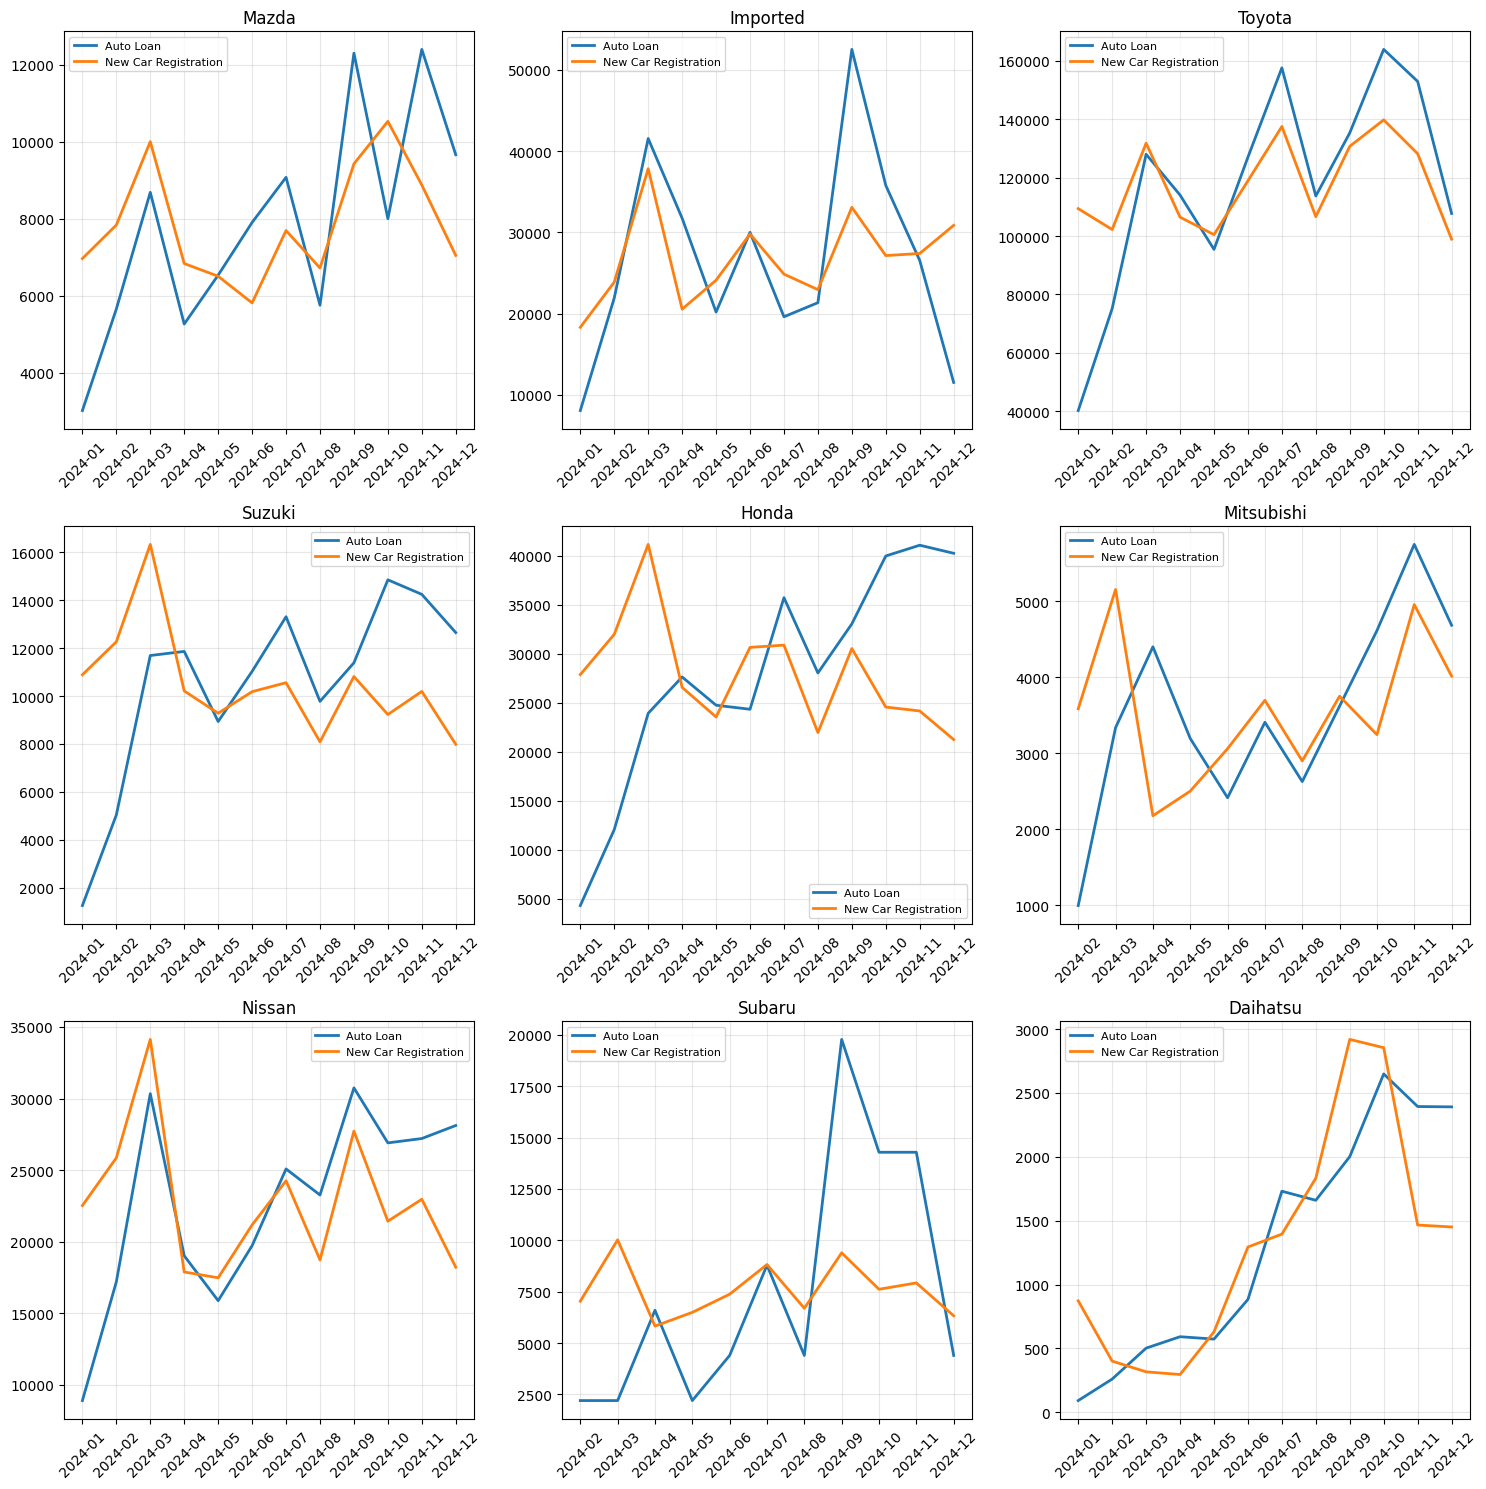

In [9]:
# 時系列の可視化を、全メーカーで一枚のグラフにn分割して表示
n_makers = len(common_makers)
n_cols = 3  # 1行あたりの列数
n_rows = (n_makers + n_cols - 1) // n_cols  # 必要な行数を計算

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
if n_rows == 1:
    axes = axes.reshape(1, -1)
elif n_cols == 1:
    axes = axes.reshape(-1, 1)

maker_english_name = {
    'いすゞ': 'Isuzu',
    'スズキ': 'Suzuki',
    'ダイハツ': 'Daihatsu',
    'トヨタ': 'Toyota',
    'ホンダ': 'Honda',
    'マツダ': 'Mazda',
    '三菱': 'Mitsubishi',
    '三菱ふそう': 'Mitsubishi Fuso',
    '日産': 'Nissan',
    '輸入車': 'Imported',
    'ＳＵＢＡＲＵ': 'Subaru'
}

# 各メーカーのプロット
for i, maker in enumerate(common_makers):
    row = i // n_cols
    col = i % n_cols
    
    # adjust factorを、各メーカーの件数と登録台数の平均値の比率にする
    adjust_factor = merged_df[merged_df['メーカー'] == maker]['登録台数'].mean() / merged_df[merged_df['メーカー'] == maker]['件数'].mean()
    print(f"メーカー: {maker}, adjust_factor: {adjust_factor:.2f}")
    
    merged_df_maker = merged_df[merged_df['メーカー'] == maker]
    
    # 英語名を取得
    english_name = maker_english_name.get(maker, maker)
    
    axes[row, col].plot(merged_df_maker['年月'], merged_df_maker['件数']*adjust_factor, 
                        label='Auto Loan', linewidth=2)
    axes[row, col].plot(merged_df_maker['年月'], merged_df_maker['登録台数'], 
                        label='New Car Registration', linewidth=2)
    axes[row, col].set_title(f'{english_name}', fontsize=12)
    axes[row, col].legend(fontsize=8)
    axes[row, col].grid(True, alpha=0.3)
    axes[row, col].tick_params(axis='x', rotation=45)

# 空のサブプロットを非表示にする
for i in range(n_makers, n_rows * n_cols):
    row = i // n_cols
    col = i % n_cols
    axes[row, col].set_visible(False)

plt.tight_layout()
plt.show()


In [10]:
def calculate_correlation_with_lags(auto_data, reg_data, max_lag=12):
    """
    オートローンデータと新車登録データの時差相関を計算
    """
    correlations = {}
    
    for lag in range(0, max_lag + 1):
        # オートローンデータをlag期間前にシフト
        shifted_auto = auto_data.shift(lag)
        
        # 有効なデータ期間で相関計算
        valid_mask = ~(shifted_auto.isna() | reg_data.isna())
        if valid_mask.sum() > 10:  # 最低10期間のデータが必要
            corr = shifted_auto[valid_mask].corr(reg_data[valid_mask])
            correlations[lag] = corr
        else:
            correlations[lag] = np.nan
    
    return correlations


In [11]:
results = []

# 共通期間の特定（2024年のデータが両方にある期間）
common_period = pd.date_range('2024-01-01', '2024-12-31', freq='MS')

for maker in common_makers:
    print(f"\n--- {maker} の分析 ---")
    
    # merged_dfから該当メーカーのデータを取得
    maker_data = merged_df[merged_df['メーカー'] == maker].copy()
    
    if len(maker_data) > 5:
        # 年月をインデックスに設定
        maker_data = maker_data.set_index('年月').sort_index()
        
        # 各ラグでの相関を計算
        all_correlations = {}
        
        # 0ヶ月から6ヶ月までの各ラグで相関を計算
        for lag in range(0, 7):
            # オートローン件数をlag期間前にシフト
            shifted_auto = maker_data['件数'].shift(lag)
            
            # 有効なデータ期間で相関計算
            valid_mask = ~(shifted_auto.isna() | maker_data['登録台数'].isna())
            if valid_mask.sum() > 5:  # 最低5期間のデータが必要
                corr = shifted_auto[valid_mask].corr(maker_data['登録台数'][valid_mask])
                all_correlations[lag] = corr
            else:
                all_correlations[lag] = np.nan
        
        # 最大相関とそのラグを見つける
        if all_correlations:
            best_lag = max(all_correlations, key=all_correlations.get)
            best_corr = all_correlations[best_lag]
            sync_corr = all_correlations.get(0, np.nan)
            
            results.append({
                'メーカー': maker,
                '最適ラグ（月）': best_lag,
                '最大相関': best_corr,
                '同期相関': sync_corr,
                'データ期間': f"{maker_data.index.min()} - {maker_data.index.max()}"
            })
            
            print(f"最適ラグ: {best_lag+0.5}ヶ月")
            print(f"最大相関: {best_corr:.3f}")
            print(f"同期相関: {sync_corr:.3f}")
            
            # 各ラグでの相関を表示
            print("各ラグでの相関:")
            for lag in sorted(all_correlations.keys()):
                print(f"  ラグ{lag+0.5}ヶ月: {all_correlations[lag]:.3f}")
        else:
            print(f"有効な相関が見つかりませんでした")
    else:
        print(f"データが不足しています（データ数: {len(maker_data)}）")


--- マツダ の分析 ---
最適ラグ: 4.5ヶ月
最大相関: 0.632
同期相関: 0.497
各ラグでの相関:
  ラグ0.5ヶ月: 0.497
  ラグ1.5ヶ月: 0.101
  ラグ2.5ヶ月: -0.067
  ラグ3.5ヶ月: 0.143
  ラグ4.5ヶ月: 0.632
  ラグ5.5ヶ月: 0.101
  ラグ6.5ヶ月: 0.105

--- 輸入車 の分析 ---
最適ラグ: 6.5ヶ月
最大相関: 0.768
同期相関: 0.620
各ラグでの相関:
  ラグ0.5ヶ月: 0.620
  ラグ1.5ヶ月: -0.219
  ラグ2.5ヶ月: -0.355
  ラグ3.5ヶ月: 0.722
  ラグ4.5ヶ月: -0.260
  ラグ5.5ヶ月: -0.374
  ラグ6.5ヶ月: 0.768

--- トヨタ の分析 ---
最適ラグ: 0.5ヶ月
最大相関: 0.758
同期相関: 0.758
各ラグでの相関:
  ラグ0.5ヶ月: 0.758
  ラグ1.5ヶ月: 0.071
  ラグ2.5ヶ月: -0.292
  ラグ3.5ヶ月: 0.553
  ラグ4.5ヶ月: 0.521
  ラグ5.5ヶ月: -0.496
  ラグ6.5ヶ月: -0.232

--- スズキ の分析 ---
最適ラグ: 4.5ヶ月
最大相関: -0.035
同期相関: -0.157
各ラグでの相関:
  ラグ0.5ヶ月: -0.157
  ラグ1.5ヶ月: -0.740
  ラグ2.5ヶ月: -0.782
  ラグ3.5ヶ月: -0.052
  ラグ4.5ヶ月: -0.035
  ラグ5.5ヶ月: -0.481
  ラグ6.5ヶ月: -0.114

--- ホンダ の分析 ---
最適ラグ: 3.5ヶ月
最大相関: -0.111
同期相関: -0.358
各ラグでの相関:
  ラグ0.5ヶ月: -0.358
  ラグ1.5ヶ月: -0.791
  ラグ2.5ヶ月: -0.615
  ラグ3.5ヶ月: -0.111
  ラグ4.5ヶ月: -0.216
  ラグ5.5ヶ月: -0.698
  ラグ6.5ヶ月: -0.355

--- 三菱 の分析 ---
最適ラグ: 2.5ヶ月
最大相関: 0.577
同期相関: 0.268
各ラグでの相関:
  ラグ0.5ヶ


=== オリコ契約件数カバー率分析（2024年） ===

1. 全体カバー率
オリコ契約件数: 35,631
新車登録台数: 2,500,870.0
カバー率: 1.42%

2. メーカー別カバー率
  メーカー    件数      登録台数  カバー率（%）
  ダイハツ  5945   14856.0    40.02
   スズキ 16030  115153.0    13.92
   ホンダ  4825  307128.0     1.57
    三菱   550   39014.0     1.41
   マツダ   935   87298.0     1.07
    日産  2605  249845.0     1.04
   トヨタ  4123 1301591.0     0.32
   輸入車   542  302470.0     0.18
ＳＵＢＡＲＵ    76   83515.0     0.09


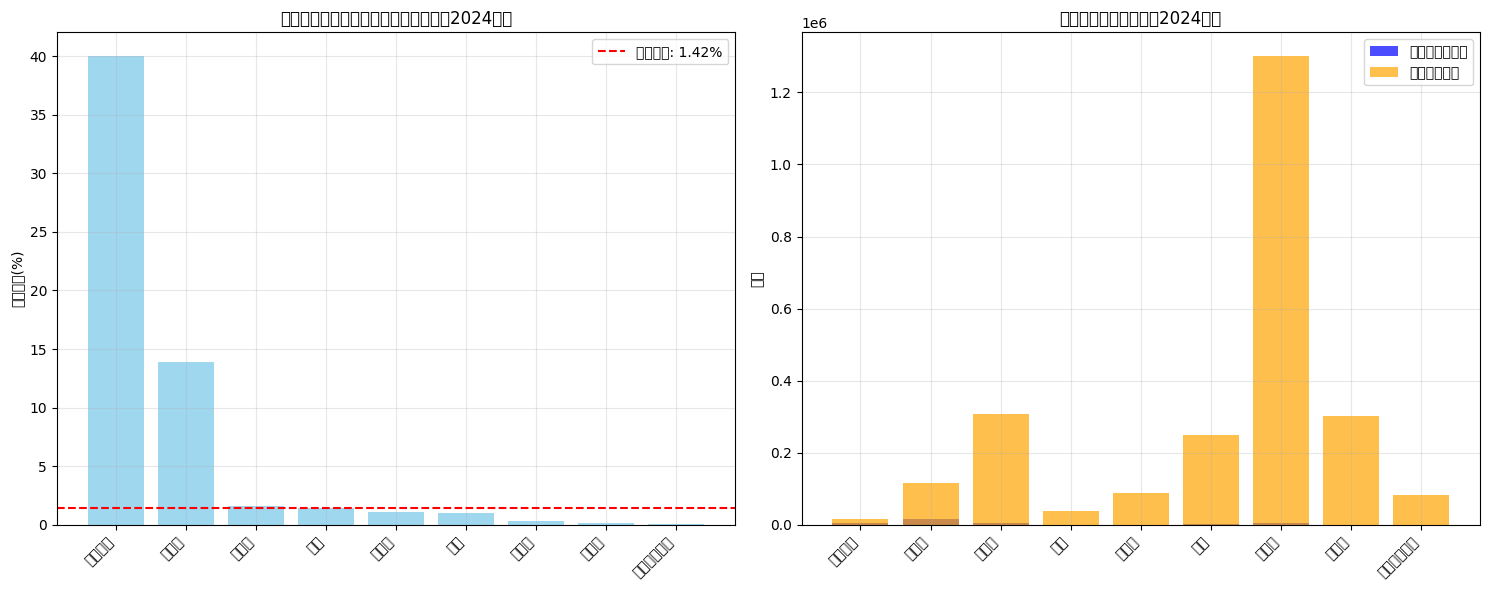


【分析結果】
• 全体のカバー率は1.42%です
• 最もカバー率が高いメーカー: ダイハツ (40.02%)
• 最もカバー率が低いメーカー: ＳＵＢＡＲＵ (0.09%)


In [12]:
# オリコの契約件数カバー率分析（2024年）
print("\n=== オリコ契約件数カバー率分析（2024年） ===")

# 2024年のデータを抽出
auto_loan_2024 = auto_loan_monthly[auto_loan_monthly['年月'] >= '2024-01-01']
auto_loan_2024 = auto_loan_2024[auto_loan_2024['年月'] <= '2024-12-01']

registration_2024 = registration_melted[registration_melted['年月'] >= '2024-01-01']
registration_2024 = registration_2024[registration_2024['年月'] <= '2024-12-01']

# メーカー別に2024年全体の合計を計算
auto_loan_total_2024 = auto_loan_2024.groupby('メーカー')['件数'].sum().reset_index()
registration_total_2024 = registration_2024.groupby('メーカー')['登録台数'].sum().reset_index()

# マージしてカバー率を計算
coverage_df = pd.merge(auto_loan_total_2024, registration_total_2024, on='メーカー', how='inner')
coverage_df['カバー率（%）'] = (coverage_df['件数'] / coverage_df['登録台数'] * 100).round(2)

# 全体のカバー率も計算
total_auto_loan = coverage_df['件数'].sum()
total_registration = coverage_df['登録台数'].sum()
overall_coverage = (total_auto_loan / total_registration * 100).round(2)

print(f"\n1. 全体カバー率")
print(f"オリコ契約件数: {total_auto_loan:,}")
print(f"新車登録台数: {total_registration:,}")
print(f"カバー率: {overall_coverage}%")

print(f"\n2. メーカー別カバー率")
coverage_sorted = coverage_df.sort_values('カバー率（%）', ascending=False)
print(coverage_sorted.to_string(index=False))

# 可視化
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# カバー率の棒グラフ
ax1.bar(range(len(coverage_sorted)), coverage_sorted['カバー率（%）'], 
         color='skyblue', alpha=0.8)
ax1.set_xticks(range(len(coverage_sorted)))
ax1.set_xticklabels(coverage_sorted['メーカー'], rotation=45, ha='right')
ax1.set_ylabel('カバー率(%)')
ax1.set_title('メーカー別オリコ契約件数カバー率（2024年）')
ax1.grid(True, alpha=0.3)
ax1.axhline(y=overall_coverage, color='red', linestyle='--', 
             label=f'全体平均: {overall_coverage}%')
ax1.legend()

# 件数と登録台数の比較
ax2.bar(range(len(coverage_sorted)), coverage_sorted['件数'], 
         alpha=0.7, label='オリコ契約件数', color='blue')
ax2.bar(range(len(coverage_sorted)), coverage_sorted['登録台数'], 
         alpha=0.7, label='新車登録台数', color='orange')
ax2.set_xticks(range(len(coverage_sorted)))
ax2.set_xticklabels(coverage_sorted['メーカー'], rotation=45, ha='right')
ax2.set_ylabel('台数')
ax2.set_title('メーカー別件数比較（2024年）')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n【分析結果】")
print(f"• 全体のカバー率は{overall_coverage}%です")
print(f"• 最もカバー率が高いメーカー: {coverage_sorted.iloc[0]['メーカー']} ({coverage_sorted.iloc[0]['カバー率（%）']}%)")
print(f"• 最もカバー率が低いメーカー: {coverage_sorted.iloc[-1]['メーカー']} ({coverage_sorted.iloc[-1]['カバー率（%）']}%)")



=== カバー率と相関の関係分析 ===

【カバー率と相関の関係】
  メーカー  カバー率（%）      最大相関  最適ラグ（月）
   スズキ    13.92 -0.035223        4
  ダイハツ    40.02  0.797299        0
   トヨタ     0.32  0.757515        0
   ホンダ     1.57 -0.110654        3
   マツダ     1.07  0.632136        4
    三菱     1.41  0.576583        2
    日産     1.04  0.405405        0
   輸入車     0.18  0.767894        6
ＳＵＢＡＲＵ     0.09  0.387268        0


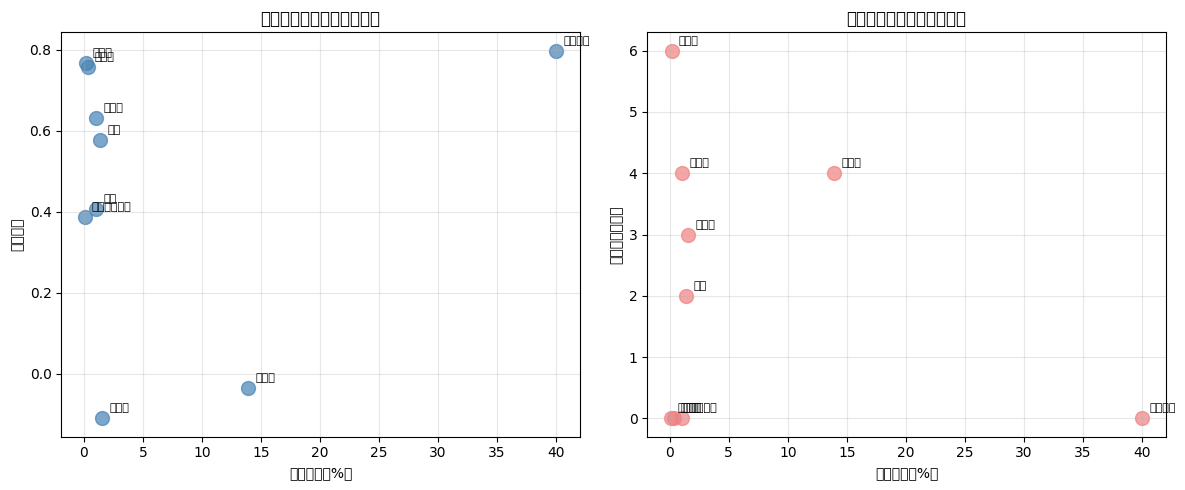


【相関分析結果】
• カバー率と最大相関の相関係数: 0.164
• カバー率と最適ラグの相関係数: -0.239

【ダイハツの詳細分析】
• カバー率: 40.02%
• 最大相関: 0.797
• 最適ラグ: 0.0ヶ月
• ダイハツは高カバー率と高相関の両方を示しており、
  オリコデータが市場動向を最も正確に反映している可能性が高い

=== 中古車を含めたオリコ契約件数カバー率分析（2024年） ===

【全体カバー率（中古車含む）】
オリコ契約件数合計（中古車含む）: 124,978件
新車登録台数合計: 2,597,435.0台
カバー率: 4.81%

【メーカー別カバー率（中古車含む）】
  メーカー    件数      登録台数  カバー率（%）
  ダイハツ 18790   14856.0   126.48
   スズキ 32907  115153.0    28.58
    日産 15068  249845.0     6.03
   ホンダ 17862  307128.0     5.82
    三菱  1718   39014.0     4.40
   マツダ  3392   87298.0     3.89
   トヨタ 30388 1301591.0     2.33
ＳＵＢＡＲＵ  1692   83515.0     2.03
   輸入車  3128  302470.0     1.03
   いすゞ    26   63727.0     0.04
 三菱ふそう     7   32838.0     0.02

【新車のみ vs 中古車含む カバー率比較】
  メーカー  新車のみカバー率（%）  中古車含むカバー率（%）  カバー率差（%）
   スズキ        13.92         28.58     14.66
  ダイハツ        40.02        126.48     86.46
   トヨタ         0.32          2.33      2.01
   ホンダ         1.57          5.82      4.25
   マツダ         1.07          3.89      2.82
    三菱         1.4

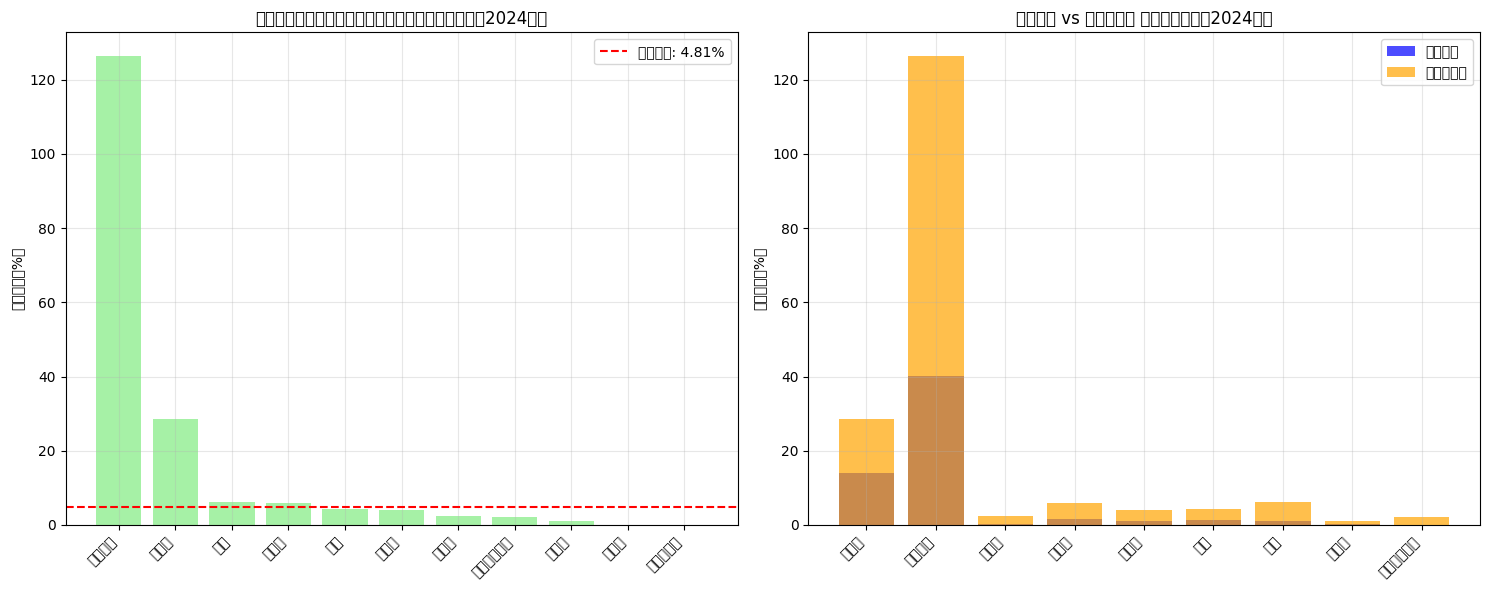


【分析結果（中古車含む）】
• 全体のカバー率（中古車含む）は4.81%です
• 新車のみのカバー率: 1.42%
• カバー率の向上: 3.39ポイント
• 最もカバー率が高いメーカー: ダイハツ (126.48%)
• 最もカバー率が低いメーカー: 三菱ふそう (0.02%)


In [13]:
#%%
# カバー率と相関の関係分析
print("\n=== カバー率と相関の関係分析 ===")

# 先行性分析の結果がある場合
if 'results' in locals() and results:
    results_df = pd.DataFrame(results)
    
    # カバー率データと相関データをマージ
    correlation_coverage_df = pd.merge(
        coverage_df[['メーカー', 'カバー率（%）']], 
        results_df[['メーカー', '最大相関', '最適ラグ（月）']], 
        on='メーカー', how='inner'
    )
    
    print(f"\n【カバー率と相関の関係】")
    print(correlation_coverage_df.to_string(index=False))
    
    # カバー率と相関の散布図
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.scatter(correlation_coverage_df['カバー率（%）'], correlation_coverage_df['最大相関'], 
               s=100, alpha=0.7, c='steelblue')
    
    # 各点にメーカー名をラベル
    for i, row in correlation_coverage_df.iterrows():
        plt.annotate(row['メーカー'], 
                    (row['カバー率（%）'], row['最大相関']),
                    xytext=(5, 5), textcoords='offset points', fontsize=8)
    
    plt.xlabel('カバー率（%）')
    plt.ylabel('最大相関')
    plt.title('カバー率と最大相関の関係')
    plt.grid(True, alpha=0.3)
    
    # カバー率とラグの関係
    plt.subplot(1, 2, 2)
    plt.scatter(correlation_coverage_df['カバー率（%）'], correlation_coverage_df['最適ラグ（月）'], 
               s=100, alpha=0.7, c='lightcoral')
    
    for i, row in correlation_coverage_df.iterrows():
        plt.annotate(row['メーカー'], 
                    (row['カバー率（%）'], row['最適ラグ（月）']),
                    xytext=(5, 5), textcoords='offset points', fontsize=8)
    
    plt.xlabel('カバー率（%）')
    plt.ylabel('最適ラグ（月）')
    plt.title('カバー率と最適ラグの関係')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # 相関分析
    coverage_corr = correlation_coverage_df['カバー率（%）'].corr(correlation_coverage_df['最大相関'])
    lag_corr = correlation_coverage_df['カバー率（%）'].corr(correlation_coverage_df['最適ラグ（月）'])
    
    print(f"\n【相関分析結果】")
    print(f"• カバー率と最大相関の相関係数: {coverage_corr:.3f}")
    print(f"• カバー率と最適ラグの相関係数: {lag_corr:.3f}")
    
    # ダイハツの詳細分析
    daihatsu_data = correlation_coverage_df[correlation_coverage_df['メーカー'] == 'ダイハツ']
    if not daihatsu_data.empty:
        print(f"\n【ダイハツの詳細分析】")
        print(f"• カバー率: {daihatsu_data.iloc[0]['カバー率（%）']}%")
        print(f"• 最大相関: {daihatsu_data.iloc[0]['最大相関']:.3f}")
        print(f"• 最適ラグ: {daihatsu_data.iloc[0]['最適ラグ（月）']:.1f}ヶ月")
        print(f"• ダイハツは高カバー率と高相関の両方を示しており、")
print(f"  オリコデータが市場動向を最も正確に反映している可能性が高い")


#%%
# 中古車を含めたオリコの契約件数カバー率分析（2024年）
print("\n=== 中古車を含めたオリコ契約件数カバー率分析（2024年） ===")

# 中古車を含むオートローンデータを準備
all_car_loans = auto_loan_df.copy()
all_car_loans['契約年月日'] = pd.to_datetime(all_car_loans['契約年月日'])

# 2週間ずらし
all_car_loans['契約年月日'] = all_car_loans['契約年月日'] - pd.Timedelta(days=14)

# メーカー名をマッピング
all_car_loans['メーカー'] = all_car_loans['メーカー'].map(maker_mapping)
all_car_loans = all_car_loans.dropna()

# 月次集計
all_car_loans_monthly = all_car_loans.groupby(['契約年月日', 'メーカー']).agg({
    '件数': 'sum',
}).reset_index()

all_car_loans_monthly['年月'] = all_car_loans_monthly['契約年月日'].dt.to_period('M')
all_car_loans_monthly = all_car_loans_monthly.groupby(['年月', 'メーカー']).agg({
    '件数': 'sum',
}).reset_index()

# 2024年のデータを抽出
all_car_loans_2024 = all_car_loans_monthly[all_car_loans_monthly['年月'] >= '2024-01-01']
all_car_loans_2024 = all_car_loans_2024[all_car_loans_2024['年月'] <= '2024-12-01']

# メーカー別に2024年全体の合計を計算
all_car_loans_total_2024 = all_car_loans_2024.groupby('メーカー')['件数'].sum().reset_index()

# マージしてカバー率を計算
all_coverage_df = pd.merge(all_car_loans_total_2024, registration_total_2024, on='メーカー', how='inner')
all_coverage_df['カバー率（%）'] = (all_coverage_df['件数'] / all_coverage_df['登録台数'] * 100).round(2)

# 全体のカバー率も計算
total_all_car_loans = all_coverage_df['件数'].sum()
total_registration_all = all_coverage_df['登録台数'].sum()
overall_all_coverage = (total_all_car_loans / total_registration_all * 100).round(2)

print(f"\n【全体カバー率（中古車含む）】")
print(f"オリコ契約件数合計（中古車含む）: {total_all_car_loans:,}件")
print(f"新車登録台数合計: {total_registration_all:,}台")
print(f"カバー率: {overall_all_coverage}%")

print(f"\n【メーカー別カバー率（中古車含む）】")
all_coverage_sorted = all_coverage_df.sort_values('カバー率（%）', ascending=False)
print(all_coverage_sorted.to_string(index=False))

# 新車のみと中古車含むの比較
comparison_df = pd.merge(
    coverage_df[['メーカー', 'カバー率（%）']].rename(columns={'カバー率（%）': '新車のみカバー率（%）'}),
    all_coverage_df[['メーカー', 'カバー率（%）']].rename(columns={'カバー率（%）': '中古車含むカバー率（%）'}),
    on='メーカー', how='inner'
)
comparison_df['カバー率差（%）'] = comparison_df['中古車含むカバー率（%）'] - comparison_df['新車のみカバー率（%）']

print(f"\n【新車のみ vs 中古車含む カバー率比較】")
print(comparison_df.to_string(index=False))

# 可視化
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 中古車含むカバー率の棒グラフ
ax1.bar(range(len(all_coverage_sorted)), all_coverage_sorted['カバー率（%）'], 
         color='lightgreen', alpha=0.8)
ax1.set_xticks(range(len(all_coverage_sorted)))
ax1.set_xticklabels(all_coverage_sorted['メーカー'], rotation=45, ha='right')
ax1.set_ylabel('カバー率（%）')
ax1.set_title('メーカー別オリコ契約件数カバー率（中古車含む、2024年）')
ax1.grid(True, alpha=0.3)
ax1.axhline(y=overall_all_coverage, color='red', linestyle='--', 
             label=f'全体平均: {overall_all_coverage}%')
ax1.legend()

# 新車のみ vs 中古車含むの比較
ax2.bar(range(len(comparison_df)), comparison_df['新車のみカバー率（%）'], 
         alpha=0.7, label='新車のみ', color='blue')
ax2.bar(range(len(comparison_df)), comparison_df['中古車含むカバー率（%）'], 
         alpha=0.7, label='中古車含む', color='orange')
ax2.set_xticks(range(len(comparison_df)))
ax2.set_xticklabels(comparison_df['メーカー'], rotation=45, ha='right')
ax2.set_ylabel('カバー率（%）')
ax2.set_title('新車のみ vs 中古車含む カバー率比較（2024年）')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n【分析結果（中古車含む）】")
print(f"• 全体のカバー率（中古車含む）は{overall_all_coverage}%です")
print(f"• 新車のみのカバー率: {overall_coverage}%")
print(f"• カバー率の向上: {overall_all_coverage - overall_coverage:.2f}ポイント")
print(f"• 最もカバー率が高いメーカー: {all_coverage_sorted.iloc[0]['メーカー']} ({all_coverage_sorted.iloc[0]['カバー率（%）']}%)")
print(f"• 最もカバー率が低いメーカー: {all_coverage_sorted.iloc[-1]['メーカー']} ({all_coverage_sorted.iloc[-1]['カバー率（%）']}%)")
